In [1]:
# Enable autoloading for utils.py and convert.py
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import convert

In [3]:
# Change plot font size
import matplotlib
matplotlib.rc('font', size=12)

# Plot filter throughputs

In [4]:
def plot_bandpass(fig, ax, bandpass_name, spectrum=None):
    bandpass = utils.get_bandpass(bandpass_name)
    bandpass_label = utils.LABELMAP[bandpass_name]
    bandpass_color = utils.COLORMAP[bandpass_name]
    
    if spectrum is None:
        ax.plot(bandpass.wave, bandpass.throughput, c=bandpass_color, label=bandpass_label)
    else:
        observation = utils.S.Observation(spectrum, bandpass, force='extrap')
        ax.plot(observation.binwave, observation.binflux, c=bandpass_color, label=bandpass_label)

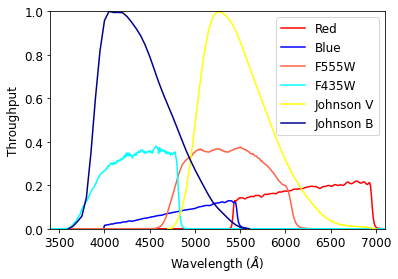

In [16]:
# Plot without spectrum

# Matplotlib setup
fig, ax = plt.subplots()

# Plot throughputs
bandpasses = ['NH_RED', 'NH_BLUE', 
              'HST_F555W', 'HST_F435W',
              'JOHNSON_V', 'JOHNSON_B']
for bp in bandpasses:
    plot_bandpass(fig, ax, bp)
    

# Show plot
ax.set_xlabel(r"Wavelength ($\AA$)")
ax.set_ylabel(r"Throughput")

ax.set_xlim(3400, 7100)
ax.set_ylim(0, 1)

ax.legend()

plt.show()

(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(JOHNSON_V) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(JOHNSON_B) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


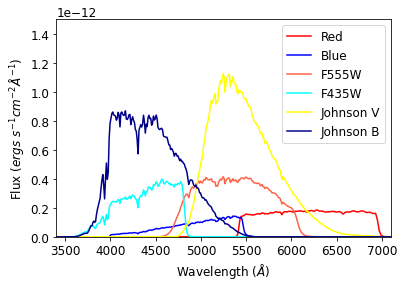

In [11]:
# Plot with spectrum

# Matplotlib setup
fig, ax = plt.subplots()

# Plot throughputs
bandpasses = ['NH_RED', 'NH_BLUE', 
              'HST_F555W', 'HST_F435W',
              'JOHNSON_V', 'JOHNSON_B']
spectrum = utils.get_spectrum('pluto')
spectrum.convert('Angstrom')
spectrum.convert('flam')
for bp in bandpasses:
    plot_bandpass(fig, ax, bp, spectrum=spectrum)
    

# Show plot
# ax.set_ylim(0, 0.4)
ax.set_xlabel(r"Wavelength ($\AA$)")
ax.set_ylabel(
    r"Flux ($ergs\ s^{−1} cm^{−2} \AA^{−1}$)"
)

ax.set_xlim(3400, 7100)
ax.set_ylim(0, 15e-13)

ax.legend()
plt.show()

# Relative Contributions
In order to use the measurements from both the New Horizons Red and Blue filters, a method for combining and converting the measurements is required. For the F555W filter, the following process is used: (1) Each input filter (NH Red and NH Blue) is converted using the normal single-filter process; (2) correlation factors are computed between the input filters and the output filters; (3) the final result is computed as the average of the single-filter conversions weighted by the correlation factors. 